**Asmaa Ibrahim Task5_Cellula**

#Import Libraries

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Load Data

In [127]:
data = pd.read_csv('/content/Task5.csv')

#UnderStand Data

In [97]:
data.head(10)

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703
5,mMC7oPiW,Kayla Martin,Wendy Bennett,Excellent,sunny,Congested Traffic,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45,-1.291560,...,1,3,2011,42.335622,32.824930,20.648176,15.741133,7.649541,3.787239,-0.674251
6,A2SNLxxM,James Burch,Casey Cannon,Excellent,windy,Flow Traffic,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00,-1.291195,...,11,1,2012,42.563234,35.482608,18.113693,19.126670,10.993150,1.555807,-0.342260
7,tT6AJSJx,Alexander Ingram,Christy Hensley,Good,sunny,Congested Traffic,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00,-1.290694,...,1,2,2012,42.533214,36.829343,16.949505,20.548489,12.449213,4.155444,2.236596
8,D0Yb52vL,Anita Porter,Ana Norton,Excellent,rainy,Dense Traffic,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00,-1.291656,...,12,0,2012,42.240568,29.608237,23.942272,11.667601,3.637447,1.253232,-1.119470
9,GorULe8F,Monica Smith,Daniel Vargas,Very Good,sunny,Dense Traffic,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00,-1.291206,...,9,2,2009,42.218767,33.106804,20.538553,16.193381,8.129651,2.849627,0.327463


In [98]:
data.columns

Index(['User ID', 'User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing'],
      dtype='object')

In [99]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
count,500000.000000,500000.000000,500000.000000,499995.000000,499995.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000
mean,11.358361,-1.265712,0.696740,-1.265755,0.696675,1.683428,13.510834,15.684206,6.268650,3.042008,2011.739132,385.279367,380.503657,363.843772,363.674038,355.991423,19.468775,0.297145
std,9.916617,0.206941,0.140909,0.205903,0.128997,1.307395,6.511571,8.681066,3.437815,1.949240,1.860889,2419.087483,2428.804740,2425.075903,2428.348683,2428.730839,367.299601,1.804548
min,-44.900000,-52.119764,-54.389440,-59.049665,-44.676047,0.000000,0.000000,1.000000,1.000000,0.000000,2009.000000,1.017646,1.460945,0.382119,0.532545,0.080500,0.000000,-3.141593
25%,6.000000,-1.291405,0.710958,-1.291393,0.710943,1.000000,9.000000,8.000000,3.000000,1.000000,2010.000000,41.341514,32.173712,17.100762,14.886989,7.147384,1.214550,-0.854721
50%,8.500000,-1.291226,0.711268,-1.291197,0.711277,1.000000,14.000000,16.000000,6.000000,3.000000,2012.000000,42.523163,34.787507,19.591554,18.347580,10.458151,2.116970,-0.050442
75%,12.500000,-1.290970,0.711520,-1.290908,0.711538,2.000000,19.000000,23.000000,9.000000,5.000000,2013.000000,43.785649,38.304502,22.214815,22.417812,14.448699,3.890070,2.206769
max,500.000000,37.360538,29.724576,0.712985,7.061893,6.000000,23.000000,31.000000,12.000000,6.000000,2015.000000,30133.067880,30167.595967,30167.285794,30159.407296,30162.285356,12399.956433,3.141593


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            500000 non-null  object 
 1   User Name          500000 non-null  object 
 2   Driver Name        500000 non-null  object 
 3   Car Condition      500000 non-null  object 
 4   Weather            500000 non-null  object 
 5   Traffic Condition  500000 non-null  object 
 6   key                500000 non-null  object 
 7   fare_amount        500000 non-null  float64
 8   pickup_datetime    500000 non-null  object 
 9   pickup_longitude   500000 non-null  float64
 10  pickup_latitude    500000 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    500000 non-null  int64  
 14  hour               500000 non-null  int64  
 15  day                500000 non-null  int64  
 16  mo

In [101]:
print(data.isnull().sum())
print(data.duplicated().sum())

User ID              0
User Name            0
Driver Name          0
Car Condition        0
Weather              0
Traffic Condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             5
ewr_dist             5
lga_dist             5
sol_dist             5
nyc_dist             5
distance             5
bearing              5
dtype: int64
0


#Data Visualization

##Plot each feature

<ipython-input-46-9252b477900e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="Car Condition", palette="Blues")


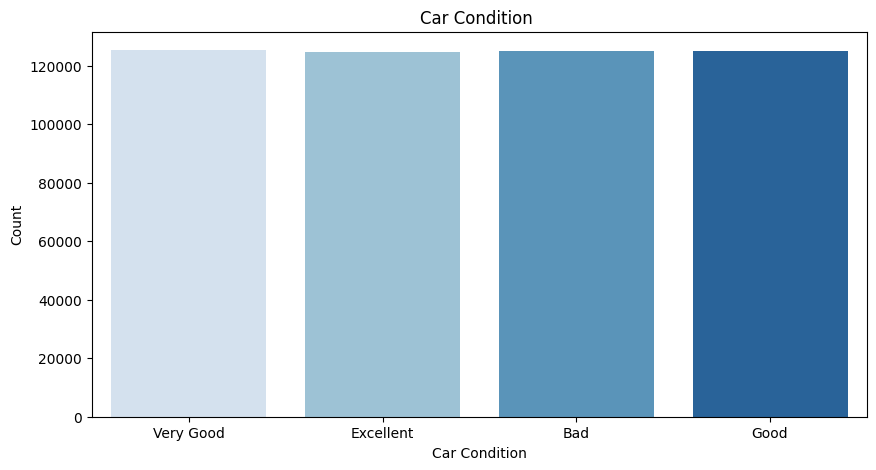

In [ ]:
#plot Car Condition
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x="Car Condition", palette="Blues")
plt.title("Car Condition ")
plt.xlabel("Car Condition")
plt.ylabel("Count")
plt.show()

<ipython-input-47-f4db329e4e6c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="Weather", palette="Blues")


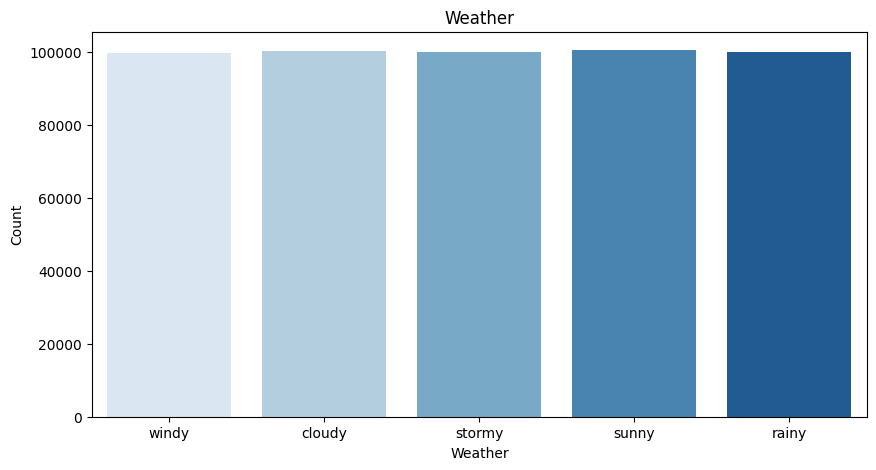

In [ ]:
#plot Weather
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x="Weather", palette="Blues")
plt.title("Weather")
plt.xlabel("Weather")
plt.ylabel("Count")
plt.show()

<ipython-input-48-6cc3245d9e19>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="Traffic Condition", palette="Blues")


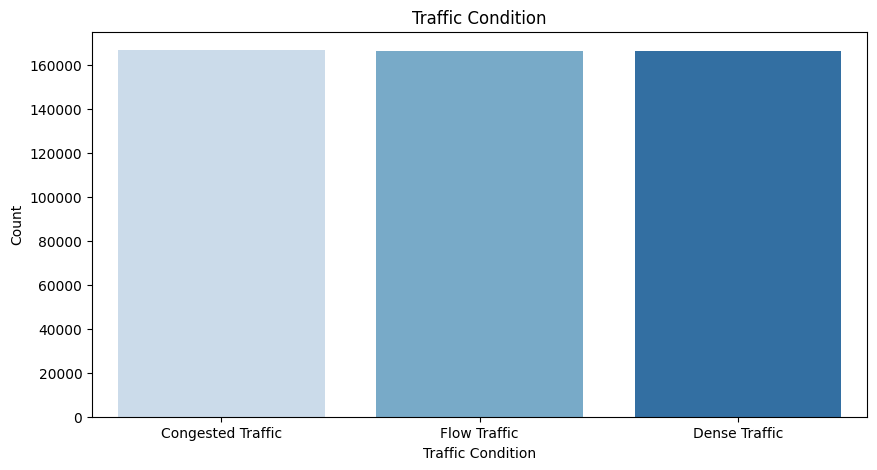

In [ ]:
#plot Traffic Condition
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x="Traffic Condition", palette="Blues")
plt.title("Traffic Condition")
plt.xlabel("Traffic Condition")
plt.ylabel("Count")
plt.show()

<ipython-input-49-aa260a879755>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="passenger_count", palette="Blues")


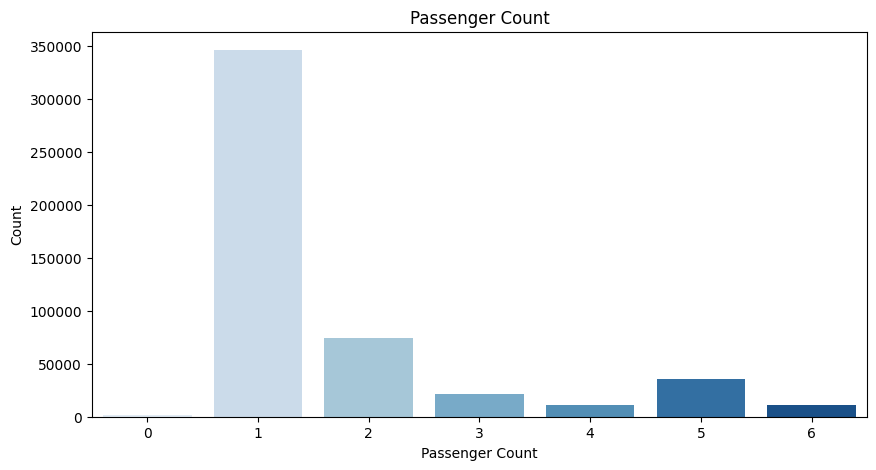

In [ ]:
#plot Passenger Count
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x="passenger_count", palette="Blues")
plt.title("Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Count")
plt.show()

##Plot the relation between features and target

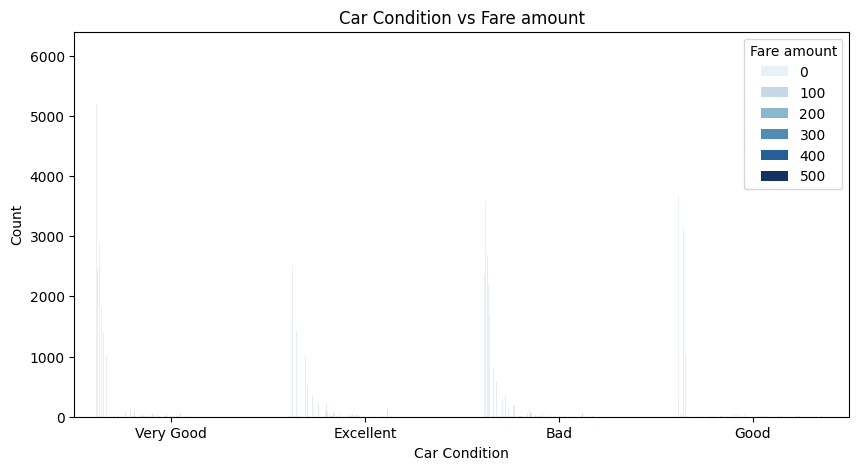

In [ ]:
#plot Car Condition vs Fare amount
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x="Car Condition", hue="fare_amount", palette="Blues")
plt.title("Car Condition vs Fare amount")
plt.xlabel("Car Condition")
plt.ylabel("Count")
plt.legend(title="Fare amount")
plt.show()

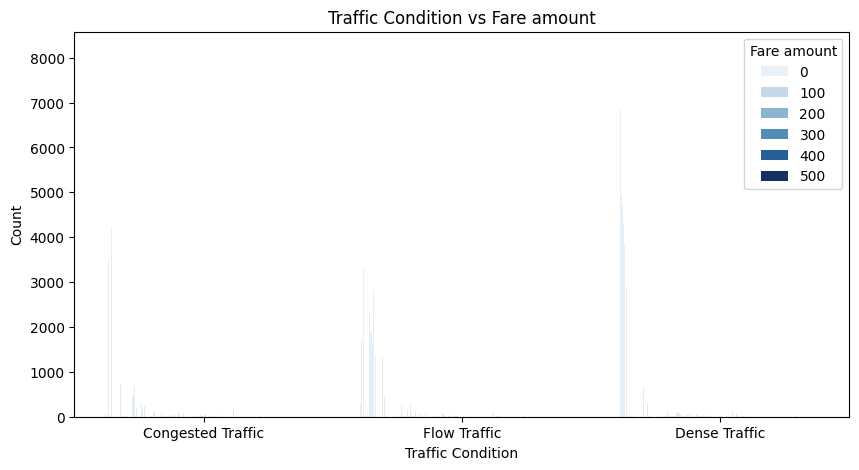

In [ ]:
#plot Traffic Condition vs Fare amount
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x="Traffic Condition", hue="fare_amount", palette="Blues")
plt.title("Traffic Condition vs Fare amount")
plt.xlabel("Traffic Condition")
plt.ylabel("Count")
plt.legend(title="Fare amount")
plt.show()

In [ ]:
#plot series
def plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['fare_amount']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])


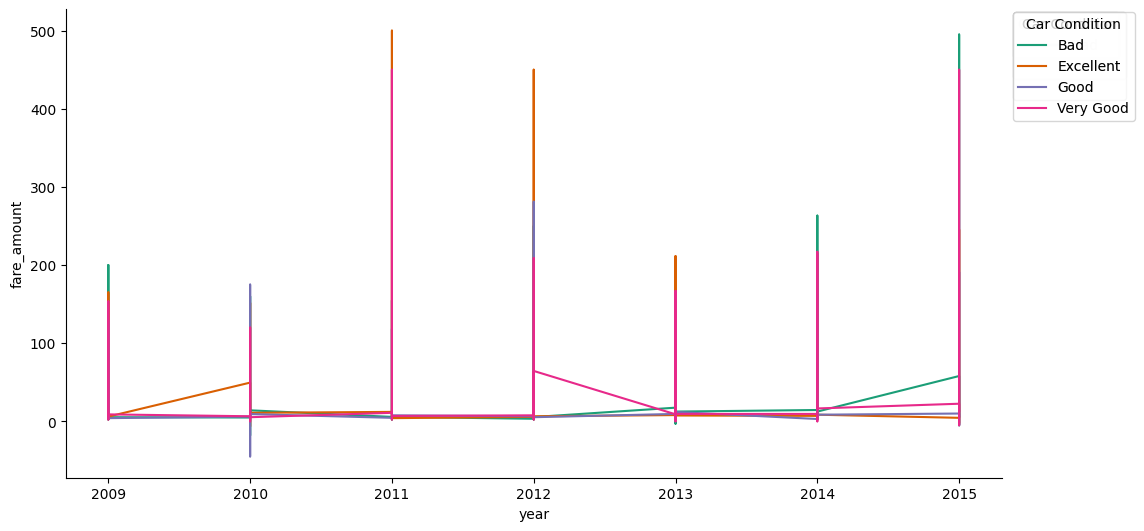

In [ ]:
#plot year vs fare amount
fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
data_sorted = data.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(data_sorted.groupby('Car Condition')):
  plot_series(series, series_name, i)
  fig.legend(title='Car Condition', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('fare_amount')

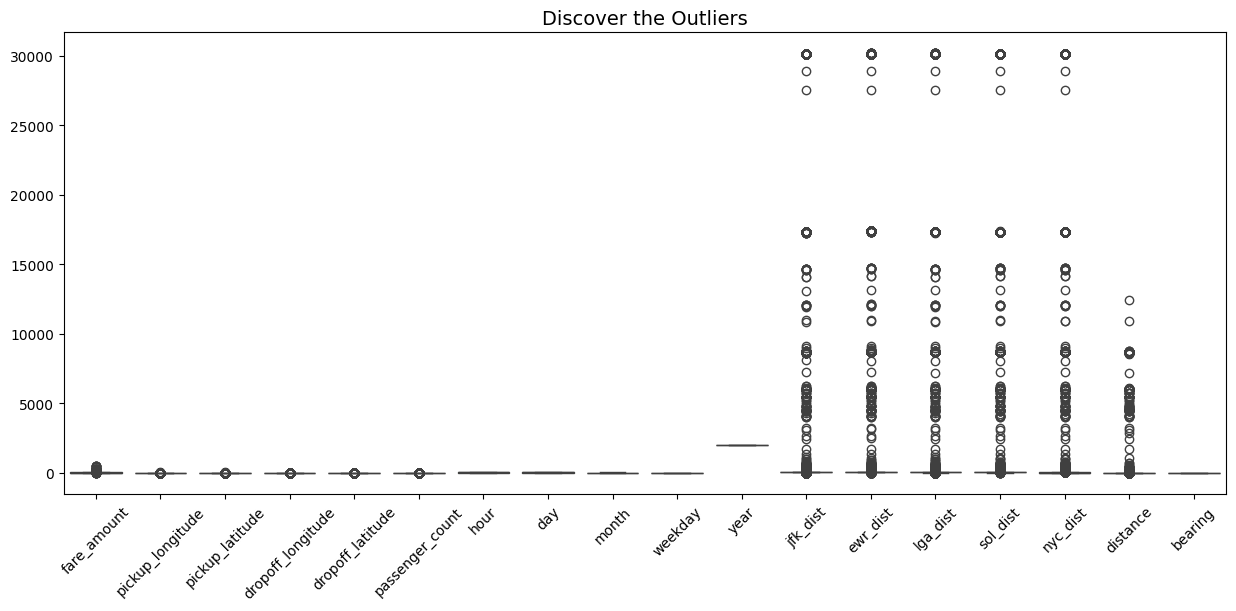

In [ ]:
#Boxplot to discover the outliers
plt.figure(figsize=(15, 6))
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.title("Discover the Outliers", fontsize=14)
plt.show()

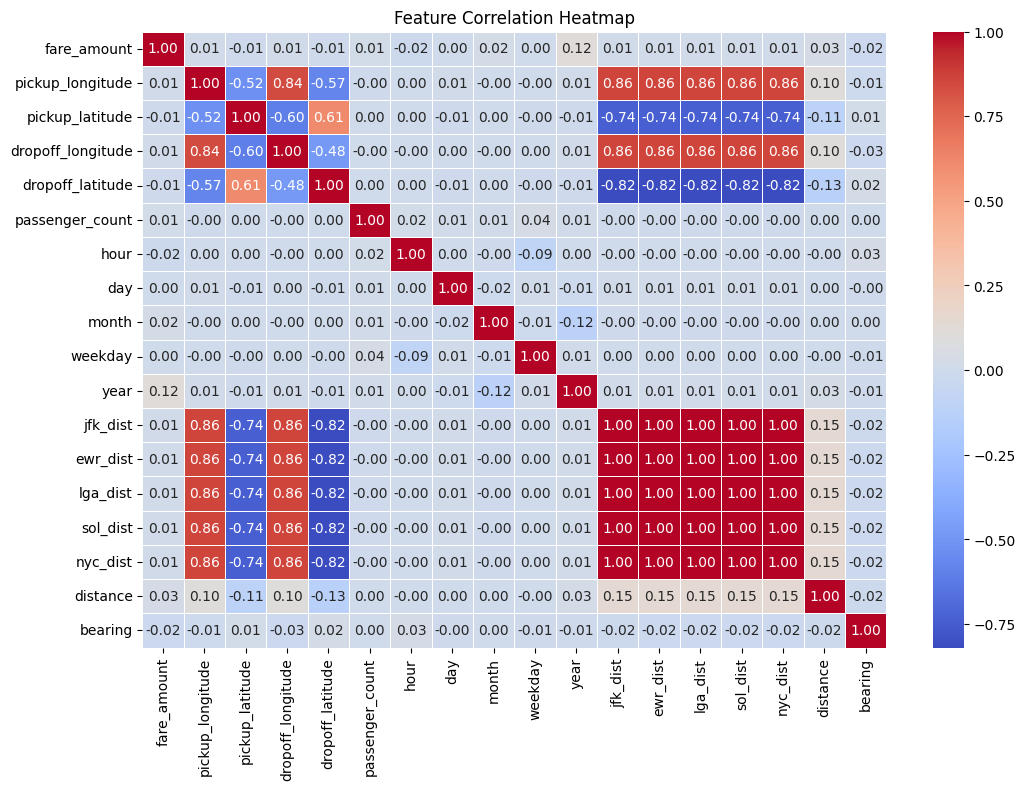

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

#Data Preprocessing

In [128]:
data.columns = data.columns.str.strip()

In [129]:
data = data.drop(columns=['User Name', 'Driver Name', 'pickup_datetime', 'User ID',
                          'bearing','Weather','pickup_longitude','pickup_latitude',
                          'dropoff_longitude','dropoff_latitude' ])
data = data.dropna()

In [130]:
# Encode Categorical Variables
car_condition_mapping = {"Excellent": 3, "Very Good": 2, "Good": 1, "Bad": 0}
traffic_condition_mapping = {"Congested Traffic": 2, "Dense Traffic": 1, "Flow Traffic": 0}

data["Car Condition"] = data["Car Condition"].map(car_condition_mapping)
data["Traffic Condition"] = data["Traffic Condition"].map(traffic_condition_mapping)


In [131]:
data.columns

Index(['Car Condition', 'Traffic Condition', 'key', 'fare_amount',
       'passenger_count', 'hour', 'day', 'month', 'weekday', 'year',
       'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist', 'distance'],
      dtype='object')

In [132]:
data = data[data["fare_amount"] > 0]
data = data[data["passenger_count"] != 0]


In [133]:
#Creating new features
data["distance_traffic"] = data["distance"] * data["Traffic Condition"]
data["rush_hour"] = data["hour"].apply(lambda x: 1 if 7 <= x <= 9 or 16 <= x <= 19 else 0)
data["speed"] = data["distance"] / (data["hour"] + 1e-3)
data['trip_duration'] = data['distance'] / (data['speed'] + 1e-3)


In [134]:
data.columns

Index(['Car Condition', 'Traffic Condition', 'key', 'fare_amount',
       'passenger_count', 'hour', 'day', 'month', 'weekday', 'year',
       'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist', 'distance',
       'distance_traffic', 'rush_hour', 'speed', 'trip_duration'],
      dtype='object')

In [121]:
#calculate and fill withmedians
trip_duration_median = data['trip_duration'].median()
fare_amount_median = data['fare_amount'].median()

data['trip_duration'] = data['trip_duration'].fillna(trip_duration_median)
data['fare_amount'] = data['fare_amount'].fillna(fare_amount_median)

In [135]:
data.columns

Index(['Car Condition', 'Traffic Condition', 'key', 'fare_amount',
       'passenger_count', 'hour', 'day', 'month', 'weekday', 'year',
       'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist', 'distance',
       'distance_traffic', 'rush_hour', 'speed', 'trip_duration'],
      dtype='object')

In [137]:
# Applying Standard Scaling only to numerical features
scaler = StandardScaler()
#Select only the numerical features from the DataFrame 'data'
numerical_features = data.select_dtypes(include=np.number).columns
data_scaled = scaler.fit_transform(data[numerical_features])

# Converting back to DataFrame
data = pd.DataFrame(data_scaled, columns=numerical_features, index=data.index)
data = data.join(data.select_dtypes(exclude=np.number))

In [123]:
data.isnull().sum()

,0
Car Condition,0
Traffic Condition,0
fare_amount,0
passenger_count,0
hour,0
day,0
month,0
weekday,0
year,0
jfk_dist,0


In [138]:
# PCA for Dimensionality Reduction
pca = PCA(n_components=0.95)
data_pca = pca.fit_transform(data)
pca_data = pd.DataFrame(data_pca)

#Machine Learning

In [147]:
y=data['fare_amount']
X=data.drop('fare_amount',axis=1)
X_train, X_test, y_train, y_test = train_test_split(pca_data, y, test_size=0.2, random_state=42)


##1- lightgbm

In [150]:
model = lgb.LGBMRegressor(n_estimators=500, learning_rate=0.05, num_leaves=50, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.050472 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3315
[LightGBM] [Info] Number of data points in the train set: 398535, number of used features: 13
[LightGBM] [Info] Start training from score 0.000694


In [151]:
mae_lgb = mean_absolute_error(y_test, y_pred)
mse_lgb = mean_squared_error(y_test, y_pred)
r2_lgb = r2_score(y_test, y_pred)

print(f"MAE: {mae_lgb:.4f}")
print(f"MSE: {mse_lgb:.4f}")
print(f"R2 Score: {r2_lgb:.4f}")

MAE: 0.0447
MSE: 0.0086
R2 Score: 0.9913


##2- xgboost

In [152]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.8 MB/s eta 0:00:00


In [153]:
import xgboost as xgb
import optuna

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000, step=50),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 10),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 10),
    }

    model = xgb.XGBRegressor(**params, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)

    return mae

study = optuna.create_study(direction="minimize")
#we can increace number of trials
study.optimize(objective, n_trials=10)

best_params = study.best_params
print("Best Hyperparameters:", best_params)

best_model = xgb.XGBRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train)

y_pred_xgb = best_model.predict(X_test)
final_mae = mean_absolute_error(y_test, y_pred_xgb)
print("Final Mean Absolute Error:", final_mae)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"Mean Absolute Error (MAE): {mae_xgb}")
print(f"Mean Squared Error (MSE): {mse_xgb}")
print(f"R² Score: {r2_xgb}")



[I 2025-03-18 20:25:19,468] A new study created in memory with name: no-name-553e49b5-e967-426a-9660-1e23a4aa5fb9
[I 2025-03-18 20:26:29,864] Trial 0 finished with value: 0.045481252698329235 and parameters: {'n_estimators': 350, 'learning_rate': 0.04014266317039139, 'max_depth': 11, 'subsample': 0.5078615278061471, 'colsample_bytree': 0.9764137582102956, 'reg_alpha': 8.887490835666354, 'reg_lambda': 3.7405977688417336}. Best is trial 0 with value: 0.045481252698329235.
[I 2025-03-18 20:27:05,559] Trial 1 finished with value: 0.06760387962262793 and parameters: {'n_estimators': 500, 'learning_rate': 0.03033418360291998, 'max_depth': 5, 'subsample': 0.5877938640563348, 'colsample_bytree': 0.8834035809956601, 'reg_alpha': 6.523037246207334, 'reg_lambda': 6.399562847348649}. Best is trial 0 with value: 0.045481252698329235.
[I 2025-03-18 20:27:37,691] Trial 2 finished with value: 0.03422035452564764 and parameters: {'n_estimators': 550, 'learning_rate': 0.1217099683391866, 'max_depth': 6,

Best Hyperparameters: {'n_estimators': 450, 'learning_rate': 0.04777179107144537, 'max_depth': 9, 'subsample': 0.8451751556566195, 'colsample_bytree': 0.7996600754534027, 'reg_alpha': 1.6215896922095963, 'reg_lambda': 5.210789280899236}
Final Mean Absolute Error: 0.031712283799541365
Mean Absolute Error (MAE): 0.031712283799541365
Mean Squared Error (MSE): 0.005751114925010351
R² Score: 0.9941872234904343
